In [1]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
'''
labels_training = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/trocafone_kaggle_test.csv', 
                              low_memory= False)
'''
labels_training = pd.read_csv('D:/DATOS/RELOADED/csv/labels_training_set.csv',
                              low_memory= False)
features = pd.read_csv('D:/DATOS/RELOADED/csv/exp_features.csv', 
                              low_memory= False)
kaggle_df = pd.read_csv('D:/DATOS/RELOADED/csv/trocafone_kaggle_test.csv', 
                              low_memory= False)

In [3]:
features.fillna(0, inplace= True)

In [4]:
test_df = pd.merge(features, labels_training, how='inner', on='person')

In [5]:
test_df.head(5)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,label
0,1,ad93850f,0.0,20.0,5.0,1.0,4.0,0.0,17.0,0.0,0.0,0.0,5.0,20.0,0.0,0.0,0.0,0
1,6,1b9f7cf6,0.0,9.0,3.0,1.0,2.0,0.0,0.0,0.0,7.0,7.0,3.0,9.0,0.0,0.0,0.0,0
2,8,de8fe91b,0.0,27.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,1.0,2.0,27.0,0.0,0.0,0.0,0
3,9,45baf068,0.0,6.0,1.0,1.0,1.0,0.0,0.0,5.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0
4,10,99abca5a,2.0,630.0,56.0,18.0,45.0,1.0,11.0,0.0,53.0,53.0,31.0,103.0,22.0,0.0,28.0,0


In [6]:
X = np.array(test_df.iloc[:, 2:17]) 
y = np.array(test_df['label']) 
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [7]:
#Instancio el xgboost
xg_reg = xgb.XGBRegressor(dtrain=data_dmatrix, objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.21, 
                          max_depth = 5, alpha = 10, n_estimators = 10)

In [8]:
#Entreno
xg_reg.fit(X_train,y_train)

XGBRegressor(alpha=10, base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3,
       dtrain=<xgboost.core.DMatrix object at 0x000001B11070D9E8>, gamma=0,
       learning_rate=0.21, max_delta_step=0, max_depth=5,
       min_child_weight=1, missing=None, n_estimators=10, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [9]:
#prediccion
preds = xg_reg.predict(X_test)

In [10]:
#Error de las predicciones
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 0.204141


**Importancia de features**

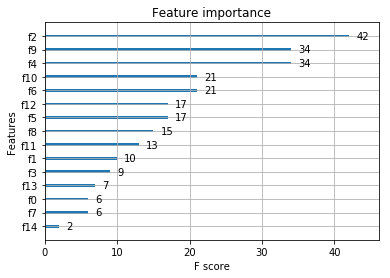

In [11]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [10, 10]
plt.show()

In [12]:
pred_df = pd.merge(features, kaggle_df, how='inner', on='person')

In [13]:
pred_df.head()

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.0
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0,133.0,43.0,0.0,0.0
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,7.0,1.0,0.0
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0,739.0,235.0,0.0,0.0
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,83.0,83.0,10.0,177.0,0.0,0.0,0.0


In [22]:
X_train = np.array(test_df.iloc[:, 2:17]) 
y_train = np.array(test_df['label']) 
X_test = np.array(pred_df.iloc[:, 2:17]) 

In [23]:
xg_reg.fit(X_train,y_train)
pred_df['label'] = xg_reg.predict(X_test)

In [24]:
#Error de las predicciones finales
final_preds_error = np.sqrt(mean_squared_error(y_test, preds))
print("Error: %f" % (final_preds_error))

Error: 0.204141


In [25]:
pred_df.head(20)

,Unnamed: 0,person,cantidad de conversiones,cantidad de veces que vio un producto,cantidad de visitas a la pagina,cantidad de checkouts,visitaron el sitio entre las 13hs y 24hs,cantidad de vistas del J5,cantidad de vistas del iphone 5s,cantidad de vistas del samsung s6 flat,cantidad de vistas del iphone 6,cantidad de vistas del iphone 6s,cantidad de vistas entre semana,cantidad de veces que vio un producto el ultimo mes,cantidad de veces que vio un producto la ultima semana,cantidad de checkouts en la ultima semana,cantidad de conversiones por visita,label
0,0,4886f805,0.0,4.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,0.0,0.000000,0.069290
1,2,0297fc1e,0.0,404.0,95.0,7.0,64.0,0.0,1.0,0.0,213.0,213.0,81.0,133.0,43.0,0.0,0.000000,0.203388
2,3,2d681dd8,0.0,13.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,13.0,7.0,1.0,0.000000,0.067118
3,4,cccea85e,0.0,739.0,22.0,1.0,18.0,0.0,2.0,1.0,0.0,0.0,20.0,739.0,235.0,0.0,0.000000,0.113124
4,5,4c8a8b93,0.0,177.0,20.0,2.0,13.0,0.0,21.0,0.0,83.0,83.0,10.0,177.0,0.0,0.0,0.000000,0.074038
5,7,29ebb414,0.0,8.0,4.0,1.0,4.0,0.0,0.0,0.0,1.0,1.0,2.0,8.0,0.0,0.0,0.000000,0.080805
6,11,3dc1950f,0.0,595.0,30.0,3.0,24.0,0.0,10.0,16.0,21.0,21.0,30.0,248.0,51.0,0.0,0.000000,0.148966
7,12,8ea4c165,0.0,97.0,7.0,3.0,6.0,3.0,0.0,9.0,0.0,0.0,4.0,87.0,0.0,0.0,0.000000,0.096487
8,14,d8cfe234,1.0,39.0,4.0,3.0,4.0,0.0,0.0,8.0,0.0,0.0,4.0,36.0,0.0,0.0,4.000000,0.103270
9,17,d6bc64df,0.0,155.0,7.0,2.0,2.0,0.0,18.0,0.0,8.0,8.0,4.0,65.0,0.0,0.0,0.000000,0.091389


In [26]:
#Armo el submit
out_df = pred_df[['person', 'label']]
out_df.set_index('person', inplace=True)
out_df.head()

,label
person,
4886f805,0.069290
0297fc1e,0.203388
2d681dd8,0.067118
cccea85e,0.113124
4c8a8b93,0.074038


In [30]:
#out_df.to_csv('/home/lucas/Documentos/Facultad/OrgaDeDatos/tp/submit.csv')
out_df.to_csv('D:/DATOS/RELOADED/csv/submit.csv')

In [31]:
out_df[out_df['label'] < 0]

,label
person,


In [32]:
out_df[out_df['label'] > 0.4]

,label
person,
fa15dd75,0.415274
55c12370,0.558148
9069d261,0.416233
3bad6b96,0.496804
c47136a5,0.559255
d7e78522,0.411207
a37b7d53,0.563330
e1443dd4,0.528152
f8d90aa5,0.495463
